# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

###Valencia Melita C - 0706022210007

## Import Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [117]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/refs/heads/main/penguins_size.csv')
df.sample(10) #print 10 sample dari dataset



,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,MALE
259,Gentoo,Biscoe,48.7,15.7,208.0,5350.0,MALE
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,MALE
272,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,FEMALE
260,Gentoo,Biscoe,42.7,13.7,208.0,3950.0,FEMALE
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,MALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,MALE
308,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [118]:
#2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


2. The dataset has 7 columns or variables, there are 4 numerical columns and 3 categorical columns. Species is the target variable.
This DataFrame contains 344 entries with 7 columns, including 4 numerical columns related to culmen length, culmen depth, flipper length, and body mass, as well as 3 categorical columns for species, island, and sex, with some missing values in the numerical columns and the sex column.

3. Show describe column and conclude what the insight is from that column

In [119]:
#3 Menunjukkan jumlah baris, rata-rata, standar deviasi, nilai minimal, kuartil 25%, kuartil 50%, kuartil 75%, dan nilai maksimal dari setiap variabel numerikal
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [120]:
#4 Menunjukkan berapa banyak value yang terdapat pada kolom spesies, pulau, dan jenis kelamin penguin
print(df['species'].value_counts())
print(df['island'].value_counts())
print(df['sex'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



Hasil ini menunjukkan distribusi spesies penguin, pulau tempat mereka ditemukan, dan jenis kelamin dari sampel data. Ada tiga spesies penguin dalam data: Adelie (152 individu), Gentoo (124 individu), dan Chinstrap (68 individu). Penguin berasal dari tiga pulau berbeda, dengan mayoritas ditemukan di Pulau Biscoe (168 penguin), diikuti oleh Pulau Dream (124 penguin), dan Pulau Torgersen (52 penguin). Untuk jenis kelamin, data hampir seimbang dengan 168 penguin jantan, 165 betina, dan satu penguin yang tidak memiliki informasi jenis kelamin yang lengkap.

5. Null handling

In [121]:
#5 Membuang data yang berisi null dan memastikan data tidak ada yang null
df.dropna(inplace=True)
df.isnull().sum()


,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

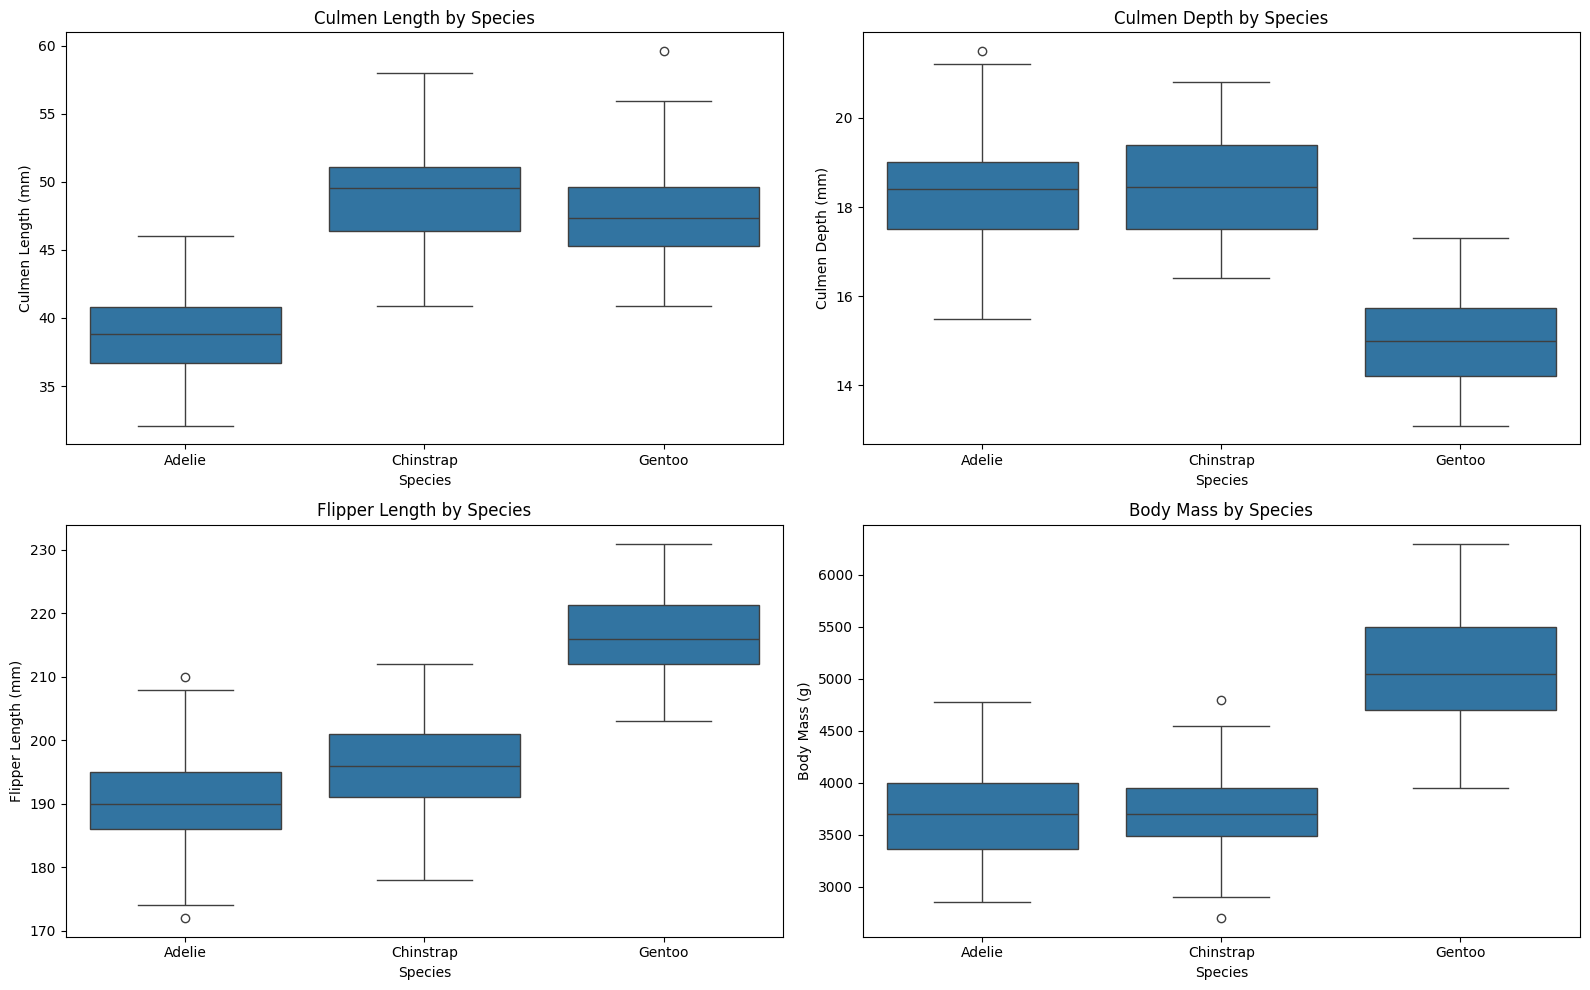

In [122]:
#6
plt.figure(figsize=(16, 10))

# Subplot for Culmen Length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='culmen_length_mm', data=df)
plt.title('Culmen Length by Species')
plt.xlabel('Species')
plt.ylabel('Culmen Length (mm)')

# Subplot for Culmen Depth
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='culmen_depth_mm', data=df)
plt.title('Culmen Depth by Species')
plt.xlabel('Species')
plt.ylabel('Culmen Depth (mm)')

# Subplot for Flipper Length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')

# Subplot for Body Mass
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')

# Adjusting layout
plt.tight_layout()
plt.show()

Boxplot ini membandingkan empat karakteristik fisik—panjang culmen, kedalaman culmen, panjang flipper, dan massa tubuh—di antara tiga spesies penguin: Adelie, Chinstrap, dan Gentoo. Pada plot panjang culmen, terlihat bahwa penguin Gentoo memiliki paruh yang secara signifikan lebih panjang dibandingkan penguin Adelie dan Chinstrap, dengan penguin Adelie memiliki paruh terpendek. Dari segi kedalaman culmen, penguin Gentoo memiliki paruh yang lebih dangkal, sedangkan penguin Adelie dan Chinstrap memiliki struktur paruh yang lebih dalam dan serupa. Plot panjang flipper menunjukkan bahwa penguin Gentoo memiliki flipper yang jauh lebih panjang daripada kedua spesies lainnya, sementara penguin Adelie dan Chinstrap memiliki panjang flipper yang sebanding, meskipun penguin Chinstrap menunjukkan rentang yang sedikit lebih besar. Terakhir, dalam perbandingan massa tubuh, penguin Gentoo kembali menonjol dengan massa tubuh yang jauh lebih besar, sementara penguin Adelie adalah yang terkecil. Secara keseluruhan, spesies Gentoo secara konsisten menunjukkan ukuran tubuh yang lebih besar dalam semua fitur yang diukur.

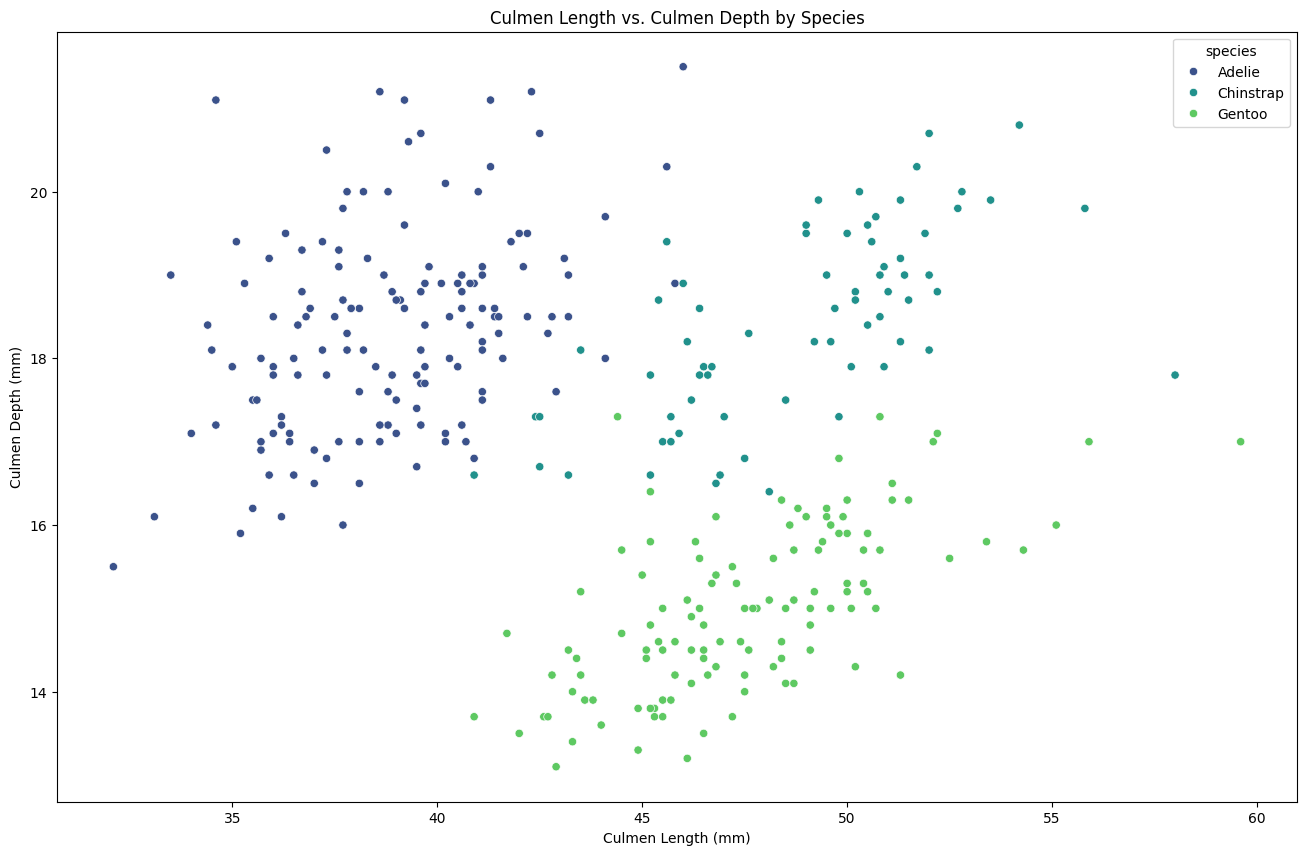

In [123]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=df, palette='viridis')
plt.title('Culmen Length vs. Culmen Depth by Species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()



Scatter plot ini menunjukkan hubungan antara panjang dan kedalaman paruh pada tiga spesies penguin: Adelie, Chinstrap, dan Gentoo. Data menunjukkan bahwa setiap spesies memiliki karakteristik paruh yang berbeda, dengan Adelie memiliki paruh terpendek dan sedang, Chinstrap sedikit lebih dalam, dan Gentoo paling panjang dan dalam. Meskipun ada perbedaan yang jelas antar spesies, terdapat juga variasi individu dalam setiap kelompok. Perbedaan morfologi paruh ini kemungkinan merupakan hasil dari adaptasi terhadap lingkungan dan makanan yang berbeda. Untuk memahami lebih lanjut, perlu dilakukan analisis statistik lebih lanjut dan mempertimbangkan faktor lain seperti habitat dan diet.


7. Check unique value of our target variable

In [124]:
#7 Mengambil nilai unik dalam kolom spesies dan di convert ke list.
df['species'].unique().tolist()


['Adelie', 'Chinstrap', 'Gentoo']

8. encode categorical columns and display the results

In [125]:
#8 Merubah kategorikal menjadi numerik
df['island'] = df['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})
df['sex'] = df['sex'].map({'MALE': 2, 'FEMALE': 1})
df['sex'] = df['sex'].fillna(0).astype(int)
df.head()




,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [126]:
#9 Merubah kolom target variabel menjadi numerikal
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

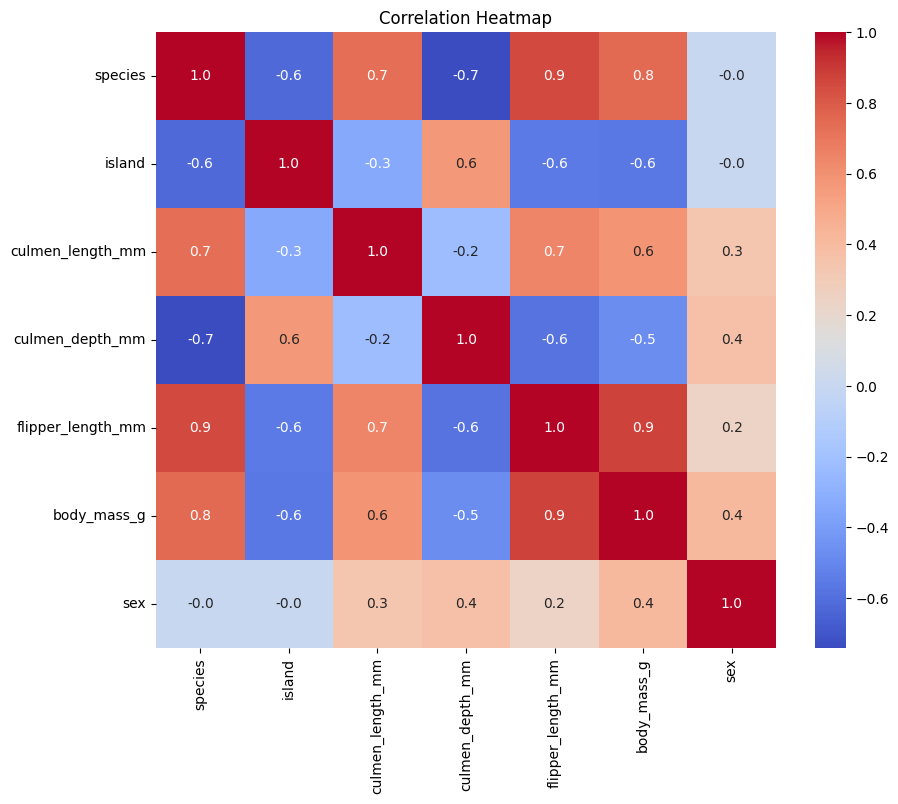

In [127]:
#10 Menunjukkan korelasi antar variabel dengan angka. Angka yang mendekati 1 atau -1 menunjukkan korelasi yang kuat.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()



Heatmap menunjukkan beberapa hubungan penting antar variabel. Ada korelasi kuat antara spesies dan panjang flipper (0.85), serta spesies dan berat badan (0.75), menunjukkan bahwa spesies penguin dapat dibedakan berdasarkan panjang flipper dan berat badan. Selain itu, panjang culmen dan panjang flipper memiliki korelasi positif sedang (0.65), artinya penguin dengan culmen lebih panjang cenderung memiliki flipper yang lebih panjang. Culmen depth dan spesies memiliki korelasi negatif (-0.74), menandakan bahwa kedalaman culmen berkaitan dengan spesies tertentu. Korelasi antara jenis kelamin dan variabel lain lemah, kecuali dengan berat badan (0.41), yang menunjukkan sedikit perbedaan berat badan antara jantan dan betina.

## Machine Learning

1. Splitting X and y

In [128]:
#1 Memecah variabel independen dan variabel target, X untuk kolom dengan variabel independen sedangkan Y untuk kolom variabel target
X = df.drop('species', axis=1)
y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [129]:
#2 Memecah data untuk testing dan juga training. Untuk testing sebanyak 20% dan untuk training sebanyak 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
#3 Memperlihatkan jumlah baris dan kolom yang ada dalam test dan train
# 267 baris dalam train, 67 baris dalam test
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [131]:
#Criterion Entropy
#a
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Membuat model decision tree dengan kriteria yang didasarkan pada entropy untuk menghitung impurity, random state digunakan untuk hasil nilai acak yang sama setiap mengambil data
# Melatih model decision tree menggunakan x-train dan y-train

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [132]:
#b
y_pred_entropy = dt_entropy.predict(X_test)
# Variabel y_pred_entropy akan berisi hasil prediksi dari data uji X_test, yang dapat digunakan untuk membandingkan hasil prediksi dengan label asli (y_test) dan menilai kinerja model.

In [133]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)
# Mengukur seberapa akurat sebuah model, nilai 0.98 menunjukkan model berhasil memberikan prediksi yang benar pada 98.5% dari seluruh sampel dalam data uji. yang menunjukkan bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan data

Model accuracy score with criterion entropy: 0.9850746268656716


In [134]:
#d
train_score = dt_entropy.score(X_train, y_train) # Menghitung akurasi pada data train. Nilai ini menunjukkan seberapa baik model dapat memprediksi label dari data yang sama digunakan saat pelatihan.
test_score = dt_entropy.score(X_test, y_test) # Menghitung akurasi model pada data uji. Ini memberikan gambaran tentang seberapa baik model dapat memprediksi label dari data yang tidak terlihat sebelumnya.
print("Training set score:", train_score) # Nilai 1 menandakan model ini berhasil memprediksi semua label dengan benar dari semua data yang dilakukan
print("Test set score:", test_score) # Nilai 0.985 menandakan akurasi yang sangat baik dengan kesalahan sekitar 1.5%

Training set score: 1.0
Test set score: 0.9850746268656716


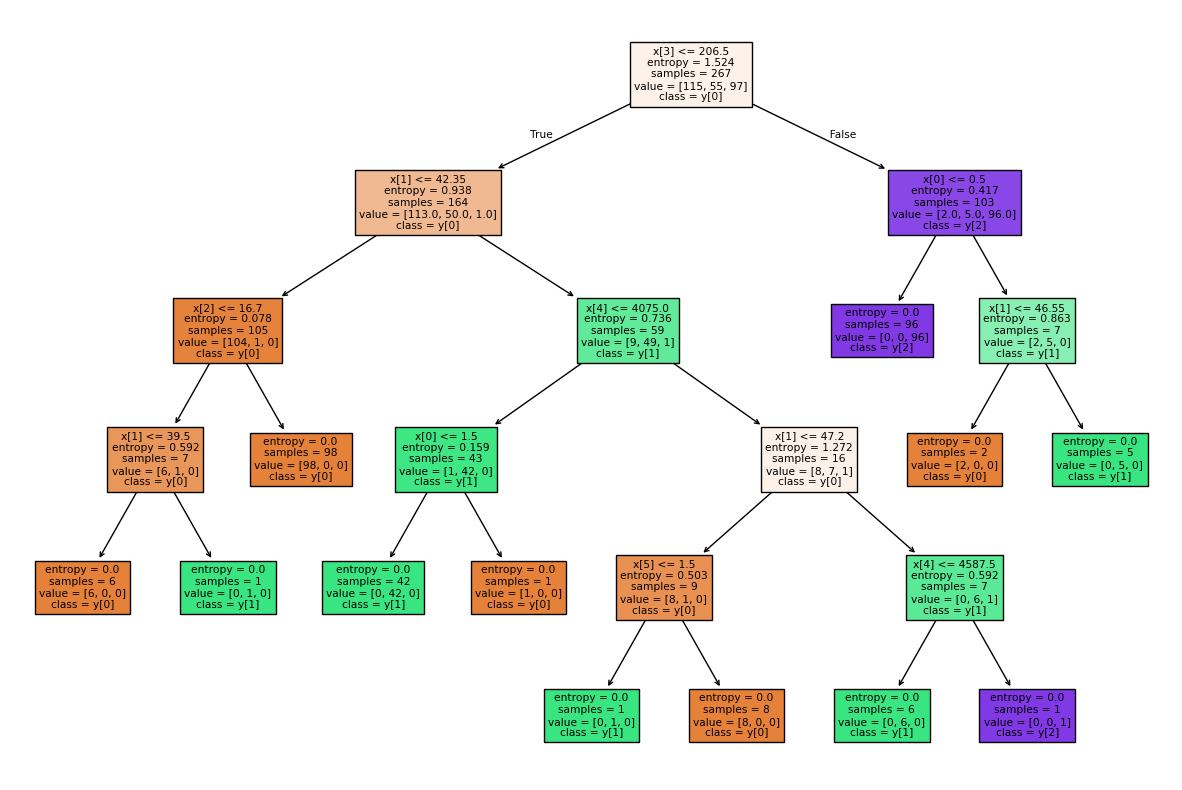

In [135]:
#e
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_entropy, filled=True, class_names=True)
plt.show()

Node Akar (X[3] <= 206.5): Ini adalah titik awal pemisahan yang memeriksa apakah fitur X[3] atau panjang culmen kurang dari atau sama dengan 206.5. Pada node ini, entropi sebesar 1.524 menunjukkan tingkat ketidakpastian atau keragaman dalam data. Terdapat 267 sampel yang terbagi menjadi tiga kelas: 115 sampel untuk kelas y[0], 55 untuk kelas y[1], dan 97 untuk kelas y[2]. Kelas mayoritas di node ini adalah y[0].

Cabang Kiri (X[1] <= 42.35): Setelah pemisahan awal berdasarkan X[3] <= 206.5, cabang kiri memeriksa apakah X[1] atau pulau kurang dari atau sama dengan 42.35. Entropi di node ini lebih rendah, yaitu 0.938, dengan 164 sampel yang tersisa, di mana mayoritasnya berada di kelas y[0] (113 sampel di y[0], 50 di y[1], dan 1 di y[2]). Cabang ini kemudian mengalami pemisahan lebih lanjut berdasarkan X[2] <= 16.7.

Cabang Kanan (X[3] > 206.5): Jika X[3] lebih besar dari 206.5, data akan menuju cabang kanan. Entropi di sini lebih rendah, yaitu 0.417, dengan 103 sampel yang mayoritas berada di kelas y[2] (96 sampel di y[2]). Cabang ini memeriksa lebih lanjut apakah X[0] (fitur pertama) <= 0.5, sebelum membagi lagi berdasarkan X[4] (fitur keempat) dan X[1].

Node: Setiap cabang akhirnya mencapai node daun, di mana entropi menjadi 0, yang menunjukkan tidak adanya ketidakpastian dan semua sampel di node tersebut termasuk dalam satu kelas tertentu. Inti dari model ini adalah bahwa Decision Tree membagi data menjadi kelompok yang lebih kecil berdasarkan fitur tertentu, sampai mencapai titik di mana setiap kelompok memiliki klasifikasi yang jelas (entropi 0). Model ini menggunakan fitur seperti X[1], X[2], dan X[3] untuk menentukan bagaimana membagi data dengan cara yang meminimalkan ketidakpastian atau keragaman di setiap cabang.

2. Criterion Gini index

In [136]:
#a
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
# Membuat model decision tree dengan kriteria yang didasarkan pada gini untuk menghitung impurity, random state digunakan untuk hasil nilai acak yang sama setiap mengambil data
# Melatih model decision tree menggunakan x-train dan y-train

DecisionTreeClassifier(random_state=42)

In [137]:
#b
y_pred_gini = dt_gini.predict(X_test)
# Variabel y_pred_gini akan berisi hasil prediksi dari data uji X_test, yang dapat digunakan untuk membandingkan hasil prediksi dengan label asli (y_test) dan menilai kinerja model.

In [138]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini:", accuracy_gini)
# Mengukur seberapa akurat sebuah model, nilai 1 menunjukkan model berhasil memberikan prediksi yang benar pada 100% dari seluruh sampel dalam data uji. yang menunjukkan bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan data

Model accuracy score with criterion gini: 1.0


In [139]:
#d
train_score = dt_gini.score(X_train, y_train) # Menghitung akurasi pada data train. Nilai ini menunjukkan seberapa baik model dapat memprediksi label dari data yang sama digunakan saat pelatihan.
test_score = dt_gini.score(X_test, y_test) # Menghitung akurasi model pada data uji. Ini memberikan gambaran tentang seberapa baik model dapat memprediksi label dari data yang tidak terlihat sebelumnya.
print("Training set score:", train_score)
print("Test set score:", test_score)

 # Nilai 1 menandakan model ini berhasil memprediksi semua label dengan benar dari semua data yang dilakukan



Training set score: 1.0
Test set score: 1.0


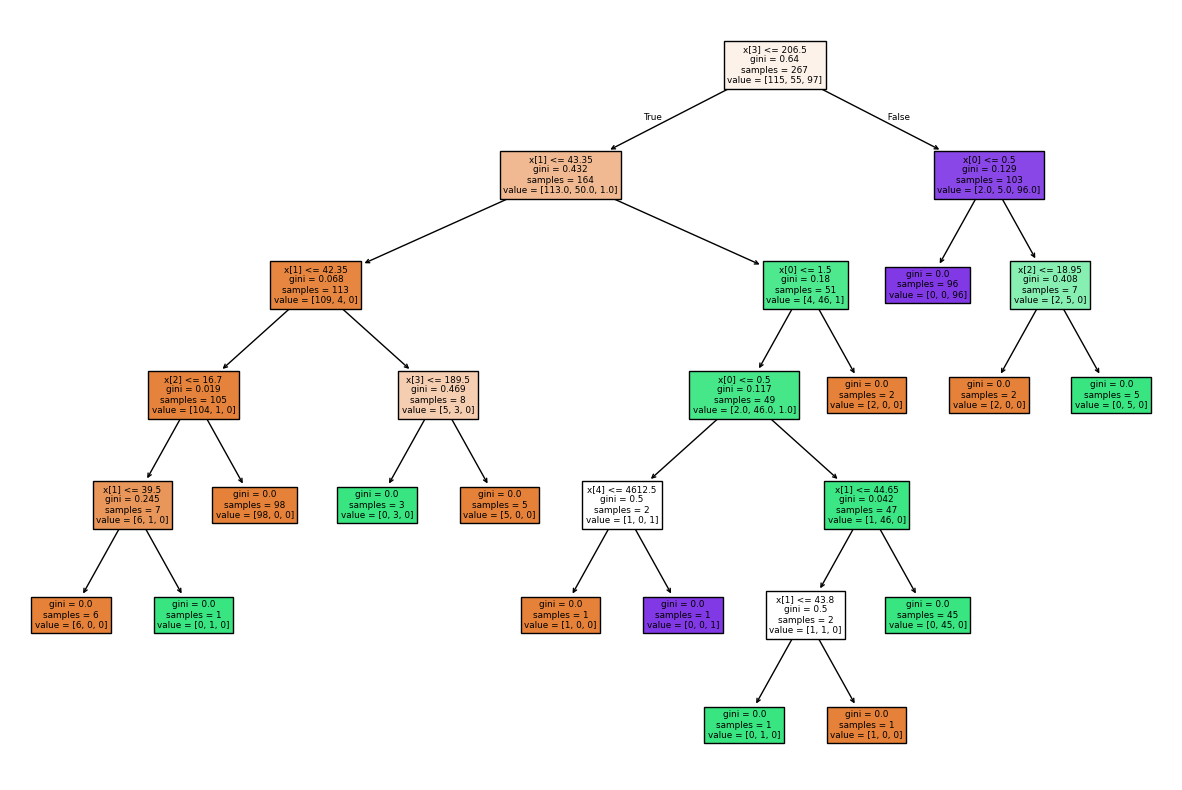

In [140]:
#e
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True, class_names=True)
plt.show()


**Node Akar (X[3] <= 206.5)**: Ini adalah node awal yang digunakan untuk memisahkan data berdasarkan fitur X[3]. Gini di node ini adalah 0.647, yang menunjukkan tingkat ketidakmurnian data. Terdapat 267 sampel di node ini, terbagi dalam tiga kelas: 115 sampel di kelas y[0], 55 di kelas y[1], dan 97 di kelas y[2], dengan kelas mayoritas adalah y[0].

**Cabang Kiri (X[1] <= 42.33)**: Cabang ini menganalisis fitur X[1] untuk menentukan apakah nilainya kurang dari atau sama dengan 42.33. Gini pada cabang ini adalah 0.0, yang menunjukkan kemurnian, berarti semua sampel di sini termasuk dalam kelas y[0], dengan total 113 sampel yang mayoritas ada di kelas y[0].

**Cabang Kanan (X[3] > 206.5)**: Cabang ini mengarahkan data ke sisi kanan pohon jika nilai X[3] lebih besar dari 206.5. Di node ini, data dipisahkan lebih lanjut berdasarkan fitur X[0] <= 0.5. Nilai Gini di node ini cukup rendah, yaitu 0.129, dengan sebagian besar sampel masuk ke kelas y[2]. Terdapat 103 sampel di node ini, dan mayoritas dari mereka tergolong ke dalam kelas y[2].

**Node**:  
Gini = 0 menunjukkan bahwa semua sampel dalam node tersebut berasal dari kelas yang sama, sehingga tidak ada ketidakmurnian (pure node). Nilai (value) mencerminkan jumlah sampel dalam setiap kelas, sementara class menunjukkan kelas yang ditetapkan untuk semua sampel di node tersebut.

Saat pohon keputusan mencapai node daun, proses pengolahan data telah selesai, dan node tersebut memberikan klasifikasi akhir untuk semua sampel yang ada di dalamnya.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [141]:
#f
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion matrix with criterion entropy:")
print(cm_entropy) # Memprediksi 30 data benar untuk kelas 0, 1 data salah. 13 data benar untuk kelas 1, 23 data benar untuk kelas 2
print("\nConfusion matrix with criterion gini:")
print(cm_gini) # Memprediksi 31 data benar untuk kelas 0. 13 data benar untuk kelas 1, 23 data benar untuk kelas 2

Confusion matrix with criterion entropy:
[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]

Confusion matrix with criterion gini:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [142]:
#g
cr_entropy = classification_report(y_test, y_pred_entropy)
cr_gini = classification_report(y_test, y_pred_gini)
print("Classification report with criterion entropy:\n", cr_entropy)
print("\nClassification report with criterion gini:\n", cr_gini)

Classification report with criterion entropy:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Classification report with criterion gini:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Precision: Metrik ini menunjukkan proporsi hasil positif yang benar terkait dengan semua prediksi positif yang dibuat. Untuk kelas 0, precision-nya adalah 1.00, yang berarti semua instance yang diklasifikasikan sebagai 0 benar. Untuk kelas 1, precision-nya adalah 0.93, yang berarti 93% dari instance yang diklasifikasikan sebagai 1 adalah benar. Kelas 2 memiliki precision 1.00.

Recall: Metrik ini mengukur proporsi positif yang sebenarnya diidentifikasi dengan benar. Kelas 0 memiliki recall 0.97, yang berarti 97% dari instance kelas 0 yang sebenarnya diidentifikasi dengan benar. Kelas 1 memiliki recall sempurna 1.00, sementara kelas 2 juga memiliki recall 1.00.

F1-Score: Ini adalah rata-rata harmonis dari precision dan recall, memberikan keseimbangan antara kedua metrik. Kelas 0 memiliki F1-score 0.98, kelas 1 0.96, dan kelas 2 memiliki F1-score sempurna 1.00.

Akurasi: Secara keseluruhan, akurasi model adalah 0.99, yang berarti model ini benar mengklasifikasikan 99% dari semua instance dalam dataset.

Rata-rata Makro: Rata-rata makro memberikan rata-rata kinerja di semua kelas tanpa memperhitungkan ketidakseimbangan kelas, memberikan bobot yang sama untuk setiap kelas. Di sini, semua metrik (precision, recall, F1-score) rata-rata antara 0.98 hingga 0.99.

Rata-rata Tertimbang: Rata-rata tertimbang mempertimbangkan jumlah instance di setiap kelas. Ini menunjukkan kinerja tinggi di semua metrik, terlihat dari nilai 0.99.

In [143]:
#h
print("Model accuracy score with criterion entropy:", accuracy_entropy)
print("Model accuracy score with criterion gini:", accuracy_gini)
# Model menghasilkan akurasi yang sangat baik dengan hasil 0.98 dan 1.

Model accuracy score with criterion entropy: 0.9850746268656716
Model accuracy score with criterion gini: 1.0


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [144]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat instance dari GaussianNB untuk naive bayes.
# Melatih model dengan data yang dilatih dan di test

GaussianNB()

In [145]:
#b
y_pred_nb = nb.predict(X_test)
# Menentukan label spesies penguin berdasarkan fitur yang ada di data pengujian.

In [146]:
#c
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
# Memprediksi 31 data benar untuk kelas 0. 13 data benar untuk kelas 1, 23 data benar untuk kelas 2

#d
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_nb))
# Akurasi sangat baik dalam memprediksi model.



Confusion Matrix:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score:
1.0


In [147]:
#e
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Precision: Semua kelas memiliki nilai 1.00, yang berarti setiap prediksi positif untuk masing-masing spesies adalah benar.
# Recall: Nilai 1.00 pada semua kelas menunjukkan bahwa model berhasil mengidentifikasi semua instance dari setiap spesies.
# F1-Score: Juga 1.00 untuk setiap kelas, menunjukkan keseimbangan sempurna antara precision dan recall.
# Support: Menunjukkan jumlah aktual untuk setiap kelas dalam dataset pengujian (31 untuk Adelie, 13 untuk Chinstrap, dan 23 untuk Gentoo).

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [149]:
#f

print("Model accuracy score with Naive Bayes:", accuracy_score(y_test, y_pred_nb))
# Naive Bayes menunjukkan kinerja yang sangat baik dengan akurasi sempurna dan tidak ada kesalahan klasifikasi.

Model accuracy score with Naive Bayes: 1.0


Good Luck :)